This notebook provides some examples of how the functions in the `ngboost_models.py` module can be used. 

In [1]:
import pandas as pd
from epigraphhub.analysis.forecast_models.plots import * 
from epigraphhub.data.preprocessing import * 
from epigraphhub.analysis.forecast_models.ngboost_models import * 


In this tutorial, we will use the data saved in the path: `./data/data_GE.csv`. This table represents the number of tests, cases, and hospitalizations (your values by day and differences in first and second order) for some cantons in Switzerland. 

In [2]:
df = pd.read_csv('./data/data_GE.csv')
df.set_index('datum', inplace = True)
df.index = pd.to_datetime(df.index)

df

,test_FR,diff_test_FR,diff_2_test_FR,test_NE,diff_test_NE,diff_2_test_NE,test_TI,diff_test_TI,diff_2_test_TI,test_VD,...,hosp_NE,diff_hosp_NE,diff_2_hosp_NE,hosp_FR,diff_hosp_FR,diff_2_hosp_FR,hosp_GE,diff_hosp_GE,diff_2_hosp_GE,vac_all
datum,,,,,,,,,,,,,,,,,,,,,
2020-03-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.142857,0.000000,0.000000,0.428571,0.142857,0.285714,0.428571,0.000000,0.000000,0.0
2020-03-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.285714,0.142857,0.142857,0.857143,0.428571,0.571429,0.428571,0.000000,0.142857,0.0
2020-03-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.428571,0.142857,0.285714,0.857143,0.000000,0.428571,0.428571,0.000000,0.000000,0.0
2020-03-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.285714,-0.142857,0.000000,0.714286,-0.142857,-0.142857,0.571429,0.142857,0.142857,0.0
2020-03-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.428571,0.142857,0.000000,1.000000,0.285714,0.142857,0.857143,0.285714,0.428571,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-26,165.857143,-0.714286,-9.000000,137.142857,1.000000,3.857143,406.428571,-7.714286,-13.714286,650.000000,...,0.000000,0.000000,0.000000,0.142857,-0.428571,-0.428571,2.571429,-0.142857,0.142857,182.8
2022-08-27,165.142857,-0.714286,-1.428571,137.285714,0.142857,1.142857,405.285714,-1.142857,-8.857143,650.000000,...,0.000000,0.000000,0.000000,0.142857,0.000000,-0.428571,2.571429,0.000000,-0.142857,182.8
2022-08-28,159.000000,-6.142857,-6.857143,135.428571,-1.857143,-1.714286,407.571429,2.285714,1.142857,645.142857,...,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,2.142857,-0.428571,-0.428571,182.8


### Class NGBModel()

This class instantiates a ngboost regressor model. This class takes as input the parameters accepted by a Ngboost model (defined in their documentation), a parameter to define the number of last observations that the model will use as input, a parameter to define the number of days that it will be predicted by the model, the percentage of the train data that will be used as validation, and a parameter to define the early stop of the training. 

This class allows the training of multiple ngboost models, each one specialized in the forecast for a single day. 

In [3]:
m = NGBModel(look_back = 14,
            predict_n = 14, 
            validation_split = 0.15, 
            early_stop = 10)

In [4]:
def remove_zeros(tgt):
    
    tgt[tgt == 0] = 0.01
    
    return tgt
    

### Method `train_eval()`

This method takes the class `NGModel()` and trains and evaluates this model.

In [5]:
df['hosp_GE'] = remove_zeros(df['hosp_GE'].values)

df_p = m.train_eval(target_name = 'hosp_GE',
                    data = df,
                    ini_date = '2020-05-01',
                    end_date = '2022-04-30',
                    ratio = 0.8, save = False)

df_p

,target,lower,median,upper,train_size
date,,,,,
2020-05-02,0.285714,0.153578,0.284875,0.528422,584
2020-05-03,0.285714,0.155924,0.310122,0.616813,584
2020-05-04,0.142857,0.062049,0.189971,0.581624,584
2020-05-05,0.142857,0.258126,0.565170,1.237446,584
2020-05-06,0.142857,0.192820,0.462597,1.109824,584
...,...,...,...,...,...
2022-04-26,7.714286,2.362565,3.491138,5.158819,584
2022-04-27,6.857143,2.227324,3.397716,5.183114,584
2022-04-28,5.714286,2.260310,3.167789,4.439608,584


### Function `plot_val()`

This function is saved in the `plots.py` module and, given the output of the `train_eval()` method plot the model's behavior in train and test sample. 

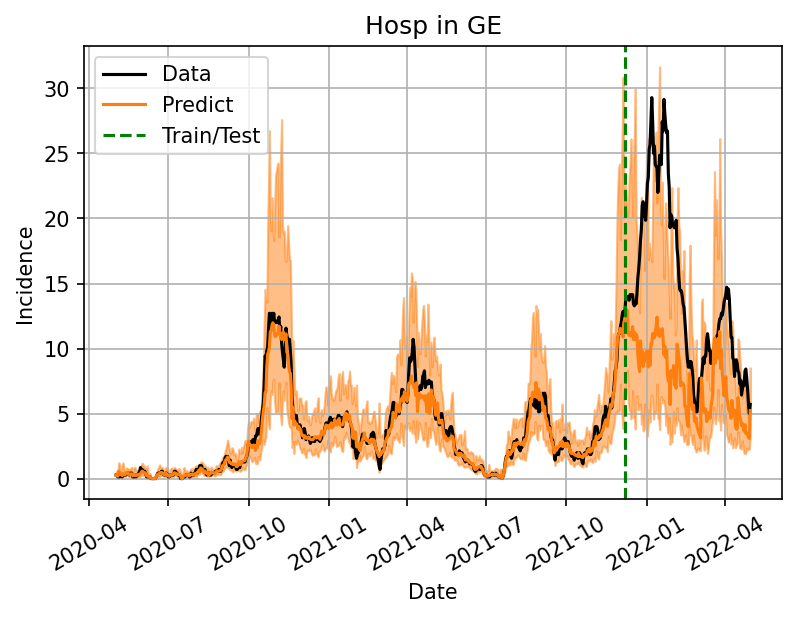

In [6]:
plot_val(df_p, title = 'Hosp in GE')


### Method `train()`

This method trains multiple ngboost models with all the data available. 


In [7]:
%%time
models = m.train(target_name='hosp_GE',
                 data=df,ini_date = '2020-05-01',
                 end_date = '2022-04-30',
                 save = True,
                 path = './saved_models',
                 name='hosp_GE')


CPU times: user 3min 41s, sys: 672 ms, total: 3min 41s
Wall time: 1h 28min 15s


Method `forecast()`

This method uses the models trained in the `train` method and applies them on the last date available (last value in df, or in the data of the date in end_date)

In [8]:
df_f = m.forecast(df, end_date = '2022-04-30',  path = './saved_models', name='hosp_GE')

df_f.head()

,lower,median,upper
date,,,
2022-05-01,3.705323,4.500179,5.465546
2022-05-02,3.628441,4.616010,5.872371
2022-05-03,3.688845,4.632263,5.816960
2022-05-04,3.560309,4.427284,5.505376
2022-05-05,3.590118,4.225725,4.973862


### Function `plot_forecast()`

This function use the data to train the model and the output of the `forecast()` method to plot the forecast. 

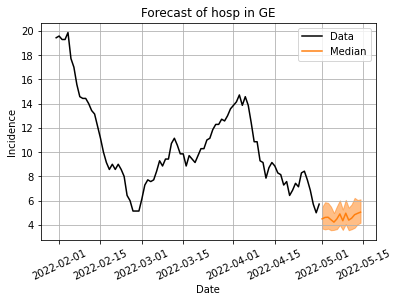

In [9]:
plot_forecast(
    df.loc[:'2022-04-30']['hosp_GE'][-90:],
    df_f,
    title = 'Forecast of hosp in GE',
    xlabel="Date",
    ylabel="Incidence", 
    save=False
    )